<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/QiskitAer_ComparingSimulators_mkbahk_20251222.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip uninstall qiskit qiskit-aer qiskit-aer-gpu -y

Found existing installation: qiskit 2.2.3
Uninstalling qiskit-2.2.3:
  Successfully uninstalled qiskit-2.2.3
Found existing installation: qiskit-aer 0.17.1
Uninstalling qiskit-aer-0.17.1:
  Successfully uninstalled qiskit-aer-0.17.1
Found existing installation: qiskit-aer-gpu 0.15.1
Uninstalling qiskit-aer-gpu-0.15.1:
  Successfully uninstalled qiskit-aer-gpu-0.15.1


In [4]:
!pip install qiskit-aer==0.17.1
!pip install qiskit[visualization]==1.2.4
!pip install qiskit-aer-gpu==0.15.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 24.6 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=a62913364d839a4dbddb2ef01c407ec6b2ecd8fe9f067c96a3d27605119b062f
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc
  Attempting uninstall: qiskit
    Found existing installation: qiskit 2.2.3
    Uninstalling qiskit-2.2.3:
      Successfully uninstalled qiskit-2.2.3


In [5]:
%pip show qiskit
%pip show qiskit-aer
%pip show qiskit-aer-gpu

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.12/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-aer-gpu
Name: qiskit-aer
Version: 0.17.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.12/dist-packages
Requires: numpy, psutil, python-dateutil, qiskit, scipy
Required-by: 
Name: qiskit-aer-gpu
Version: 0.15.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-

In [6]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

In [7]:
simulator = AerSimulator()

In [8]:
simulator.available_devices()

('CPU', 'GPU')

In [9]:
simulator.available_methods()

('automatic',
 'statevector',
 'density_matrix',
 'stabilizer',
 'matrix_product_state',
 'extended_stabilizer',
 'unitary',
 'superop',
 'tensor_network')

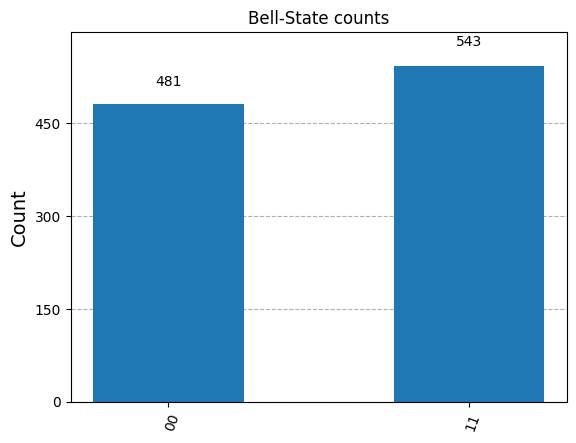

In [10]:
#Create circuit
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.measure_all()

# Transpile for simulator
simulator = AerSimulator()
circ = transpile(circ, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

In [11]:
# Run and get memory
result = simulator.run(circ, shots=10, memory=True).result()
memory = result.get_memory(circ)
print(memory)

['11', '11', '00', '11', '11', '00', '00', '00', '11', '11']


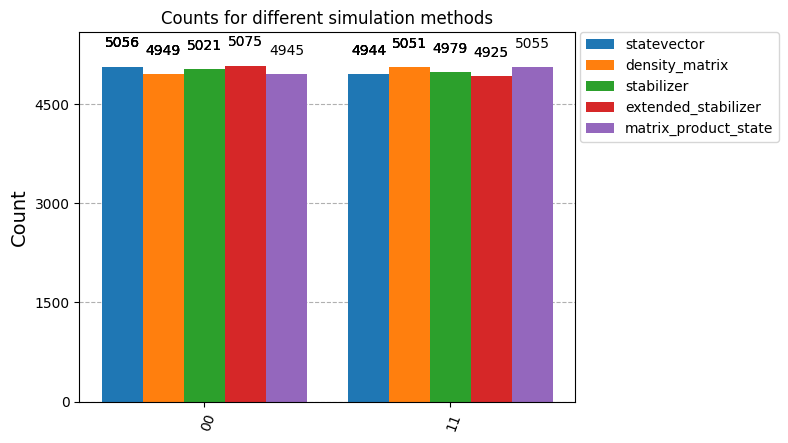

In [12]:
# Increase shots to reduce sampling variance
shots = 10000

# Statevector simulation method
sim_statevector = AerSimulator(method='statevector')
job_statevector = sim_statevector.run(circ, shots=shots)
counts_statevector = job_statevector.result().get_counts(0)

# Stabilizer simulation method
sim_stabilizer = AerSimulator(method='stabilizer')
job_stabilizer = sim_stabilizer.run(circ, shots=shots)
counts_stabilizer = job_stabilizer.result().get_counts(0)


# Extended Stabilizer method
sim_extstabilizer = AerSimulator(method='extended_stabilizer')
job_extstabilizer = sim_extstabilizer.run(circ, shots=shots)
counts_extstabilizer = job_extstabilizer.result().get_counts(0)

# Density Matrix simulation method
sim_density = AerSimulator(method='density_matrix')
job_density = sim_density.run(circ, shots=shots)
counts_density = job_density.result().get_counts(0)

# Matrix Product State simulation method
sim_mps = AerSimulator(method='matrix_product_state')
job_mps = sim_mps.run(circ, shots=shots)
counts_mps = job_mps.result().get_counts(0)


plot_histogram([counts_statevector, counts_stabilizer, counts_extstabilizer, counts_density, counts_mps],
               title='Counts for different simulation methods',
               legend=[ 'statevector','density_matrix','stabilizer','extended_stabilizer', 'matrix_product_state']
               )

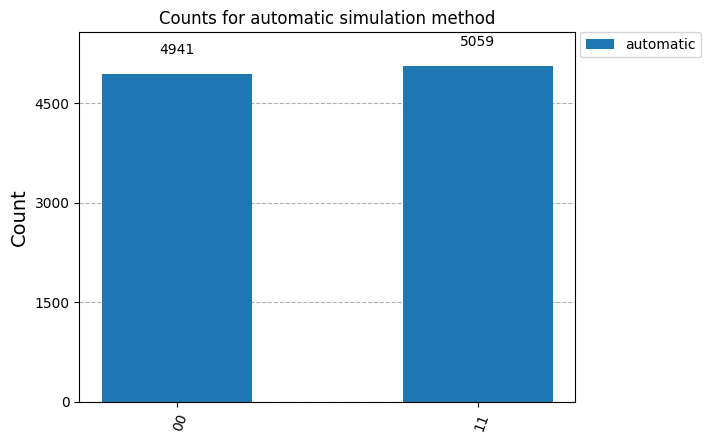

In [13]:
#automatic
sim_automatic = AerSimulator(method='automatic')
job_automatic = sim_automatic.run(circ, shots=shots)
counts_automatic = job_automatic.result().get_counts(0)

plot_histogram([counts_automatic], title='Counts for automatic simulation method',legend=[ 'automatic'])

In [18]:
from qiskit_aer import AerError

# Initialize a GPU backend
# Note that the cloud instance for tutorials does not have a GPU
# so this will raise an exception.
try:
    simulator_gpu = AerSimulator(method='statevector', device='GPU')

except AerError as e:
    print(e)
###try

In [19]:
from qiskit_aer import AerError

# Initialize a GPU backend
# Note that the cloud instance for tutorials does not have a GPU
# so this will raise an exception.
try:
    simulator_gpu = AerSimulator(method='tensor_network', device='GPU')

except AerError as e:
    print(e)
###try

In [20]:
simulator_gpu.available_devices()

['GPU']

In [21]:
simulator = AerSimulator(method='statevector')
simulator.set_options(precision='single')

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
print(counts)

{'11': 504, '00': 520}


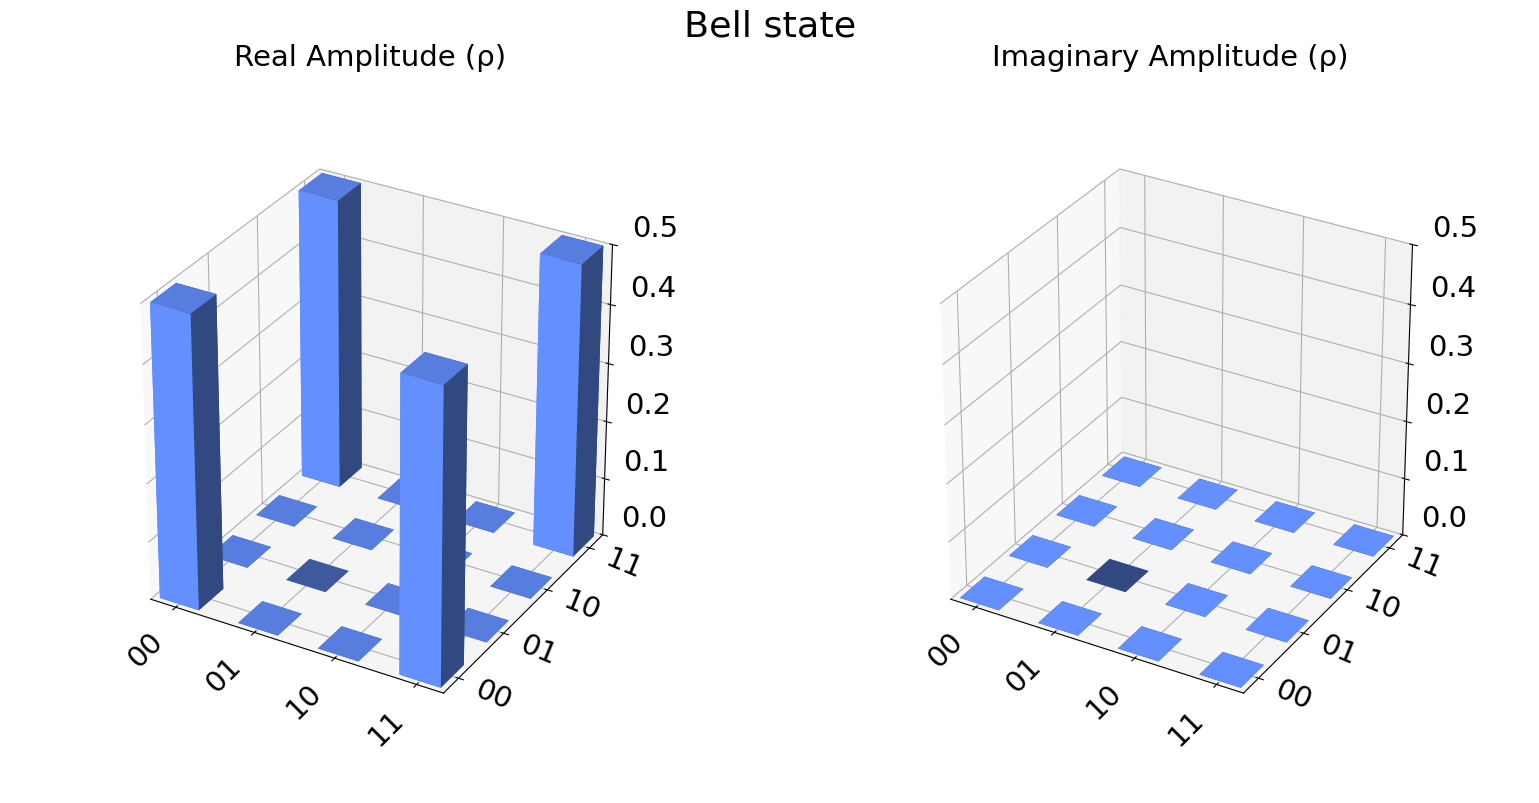

In [22]:
# Construct quantum circuit without measure
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.save_statevector()

# Transpile for simulator
simulator = AerSimulator(method='statevector')
circ = transpile(circ, simulator)

# Run and get statevector
result = simulator.run(circ).result()
statevector = result.get_statevector(circ)
plot_state_city(statevector, title='Bell state')

In [23]:
# Construct quantum circuit without measure
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.save_unitary()

# Transpile for simulator
simulator = AerSimulator(method = 'unitary')
circ = transpile(circ, simulator)

# Run and get unitary
result = simulator.run(circ).result()
unitary = result.get_unitary(circ)
print("Circuit unitary:\n", np.asarray(unitary).round(5))

Circuit unitary:
 [[ 0.70711+0.j  0.70711-0.j  0.     +0.j  0.     +0.j]
 [ 0.     +0.j  0.     +0.j  0.70711+0.j -0.70711+0.j]
 [ 0.     +0.j  0.     +0.j  0.70711+0.j  0.70711-0.j]
 [ 0.70711+0.j -0.70711+0.j  0.     +0.j  0.     +0.j]]


In [24]:
# Construct quantum circuit without measure
steps = 5
circ = QuantumCircuit(1)
for i in range(steps):
    circ.save_statevector(label=f'psi_{i}')
    circ.rx(i * np.pi / steps, 0)
circ.save_statevector(label=f'psi_{steps}')

# Transpile for simulator
simulator = AerSimulator(method= 'automatic')
circ = transpile(circ, simulator)

# Run and get saved data
result = simulator.run(circ).result()
data = result.data(0)
data

{'psi_5': Statevector([-1.+0.00000000e+00j,  0.-5.55111512e-17j],
             dims=(2,)),
 'psi_4': Statevector([-0.30901699+0.j        ,  0.        -0.95105652j],
             dims=(2,)),
 'psi_3': Statevector([0.58778525+0.j        , 0.        -0.80901699j],
             dims=(2,)),
 'psi_2': Statevector([0.95105652+0.j        , 0.        -0.30901699j],
             dims=(2,)),
 'psi_1': Statevector([1.+0.j, 0.+0.j],
             dims=(2,)),
 'psi_0': Statevector([1.+0.j, 0.+0.j],
             dims=(2,))}

In [25]:
# Generate a random statevector
num_qubits = 2
psi = qi.random_statevector(2 ** num_qubits, seed=100)

# Set initial state to generated statevector
circ = QuantumCircuit(num_qubits)
circ.set_statevector(psi)
circ.save_state()

# Transpile for simulator
simulator = AerSimulator(method='statevector')
circ = transpile(circ, simulator)

# Run and get saved data
result = simulator.run(circ).result()
result.data(0)

{'statevector': Statevector([-0.49859823-0.41410205j,  0.12480824+0.46132192j,
               0.33634191+0.30214216j,  0.234309  +0.3036574j ],
             dims=(2, 2))}

In [26]:
# Use initilize instruction to set initial state
circ = QuantumCircuit(num_qubits)
circ.initialize(psi, range(num_qubits))
circ.save_state()

# Transpile for simulator
simulator = AerSimulator(method= 'statevector')
circ = transpile(circ, simulator)

# Run and get result data
result = simulator.run(circ).result()
result.data(0)

{'statevector': Statevector([-0.49859823-0.41410205j,  0.12480824+0.46132192j,
               0.33634191+0.30214216j,  0.234309  +0.3036574j ],
             dims=(2, 2))}

In [27]:
num_qubits = 2
rho = qi.random_density_matrix(2 ** num_qubits, seed=100)
circ = QuantumCircuit(num_qubits)
circ.set_density_matrix(rho)
circ.save_state()

# Transpile for simulator
simulator = AerSimulator(method='density_matrix')
circ = transpile(circ, simulator)

# Run and get saved data
result = simulator.run(circ).result()
result.data(0)

{'density_matrix': DensityMatrix([[ 0.2075308 +0.j        ,  0.13161422-0.01760848j,
                  0.0442826 +0.07742704j,  0.04852053-0.01303171j],
                [ 0.13161422+0.01760848j,  0.20106116+0.j        ,
                  0.02568549-0.03689812j,  0.0482903 -0.04367912j],
                [ 0.0442826 -0.07742704j,  0.02568549+0.03689812j,
                  0.39731492+0.j        , -0.01114025-0.13426423j],
                [ 0.04852053+0.01303171j,  0.0482903 +0.04367912j,
                 -0.01114025+0.13426423j,  0.19409312+0.j        ]],
               dims=(2, 2))}

In [28]:
# Generate a random Clifford C
num_qubits = 2
stab = qi.random_clifford(num_qubits, seed=100)

# Set initial state to stabilizer state C|0>
circ = QuantumCircuit(num_qubits)
circ.set_stabilizer(stab)
circ.save_state()

# Transpile for simulator
simulator = AerSimulator(method= "stabilizer")
circ = transpile(circ, simulator)

# Run and get saved data
result = simulator.run(circ).result()
result.data(0)

{'stabilizer': StabilizerState(['+ZZ', '-IZ'])}

In [29]:
# Generate a random unitary
num_qubits = 2
unitary = qi.random_unitary(2 ** num_qubits, seed=100)

# Set initial state to unitary
circ = QuantumCircuit(num_qubits)
circ.set_unitary(unitary)
circ.save_state()

# Transpile for simulator
simulator = AerSimulator(method='unitary')
circ = transpile(circ, simulator)

# Run and get saved data
result = simulator.run(circ).result()
result.data(0)

{'unitary': Operator([[-0.44885724-0.26721573j,  0.10468034-0.00288681j,
             0.4631425 +0.15474915j, -0.11151309-0.68210936j],
           [-0.37279054-0.38484834j,  0.3820592 -0.49653433j,
             0.14132327-0.17428515j,  0.19643043+0.48111423j],
           [ 0.2889092 +0.58750499j,  0.39509694-0.22036424j,
             0.49498355+0.2388685j ,  0.25404989-0.00995706j],
           [ 0.01830684+0.10524311j,  0.62584001+0.01343146j,
            -0.52174025-0.37003296j,  0.12232823-0.41548904j]],
          input_dims=(2, 2), output_dims=(2, 2))}

In [30]:
import qiskit
qiskit.__version__

'1.2.4'